In [1]:
#Import the packages and ignore default warning status
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 1. Exploring the dataset

In [2]:
#Load the given dataset and make it a pandas variable
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [3]:
#Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#Get a numerical feel of the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Cleaning the dataset

In [5]:
# Checking for unique valued data
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [6]:
#Removing the unique valued columns
df_1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [7]:
#Missing values check for the columns
round(100*(df_1.isnull().sum()/len(df_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [8]:
# Removing the columns having >30% missing values as it would mess up our analysis
df_2 = df_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number','Tags'],axis=1)
df_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [9]:
#Check for missing value %age
round(100*(df_2.isnull().sum()/len(df_2.index)))

Prospect ID                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

__We can see here that there are 4 remaining columns with a significant amount of missing values. But simply eliminating them would cost us as it would result in discrepencies as it is possible that our output is highly correlated with any of the variables. Hence, it would be better to replace the missing values with some data.__

In [10]:
#Replacing NaN values of the 4 columns with our defined constant 'NA' i.e., not available
df_2['Country'] = df_2['Country'].fillna('NA')
df_2['Specialization'] = df_2['Specialization'].fillna('NA') 
df_2['What is your current occupation'] = df_2['What is your current occupation'].fillna('NA')
df_2['What matters most to you in choosing a course'] = df_2['What matters most to you in choosing a course'].fillna('NA')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [11]:
#Check for missing values after replacement
round(100*(df_2.isnull().sum()/len(df_2.index)))

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

__TotalVisits, Page Views Oer Visit and Last Activity seems to have 1% of null values. Therefore, they can be removed.__

In [12]:
df_3 = df_2[df_2.isnull().sum(axis=1) <1] #df_3 would consist of all the columns having <1% of missing values

In [13]:
#Percentage of missing values after removal
round(100*(df_3.isnull().sum()/len(df_3.index)))

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [14]:
df_3.shape

(9074, 22)

__Hence, the data is cleaned, it has a total of 22 columns and 9074 rows, and it can be taken for EDA__

## 3. Exploratory Data Analysis

### Visualising categorical variables

In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

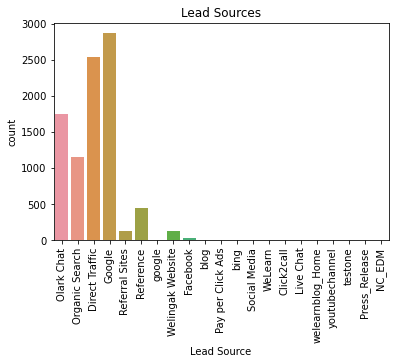

In [16]:
#Checking the major sources of overall leads
sns.countplot(df_3['Lead Source']).tick_params(rotation=90, axis='x')
plt.title('Lead Sources')
plt.show()

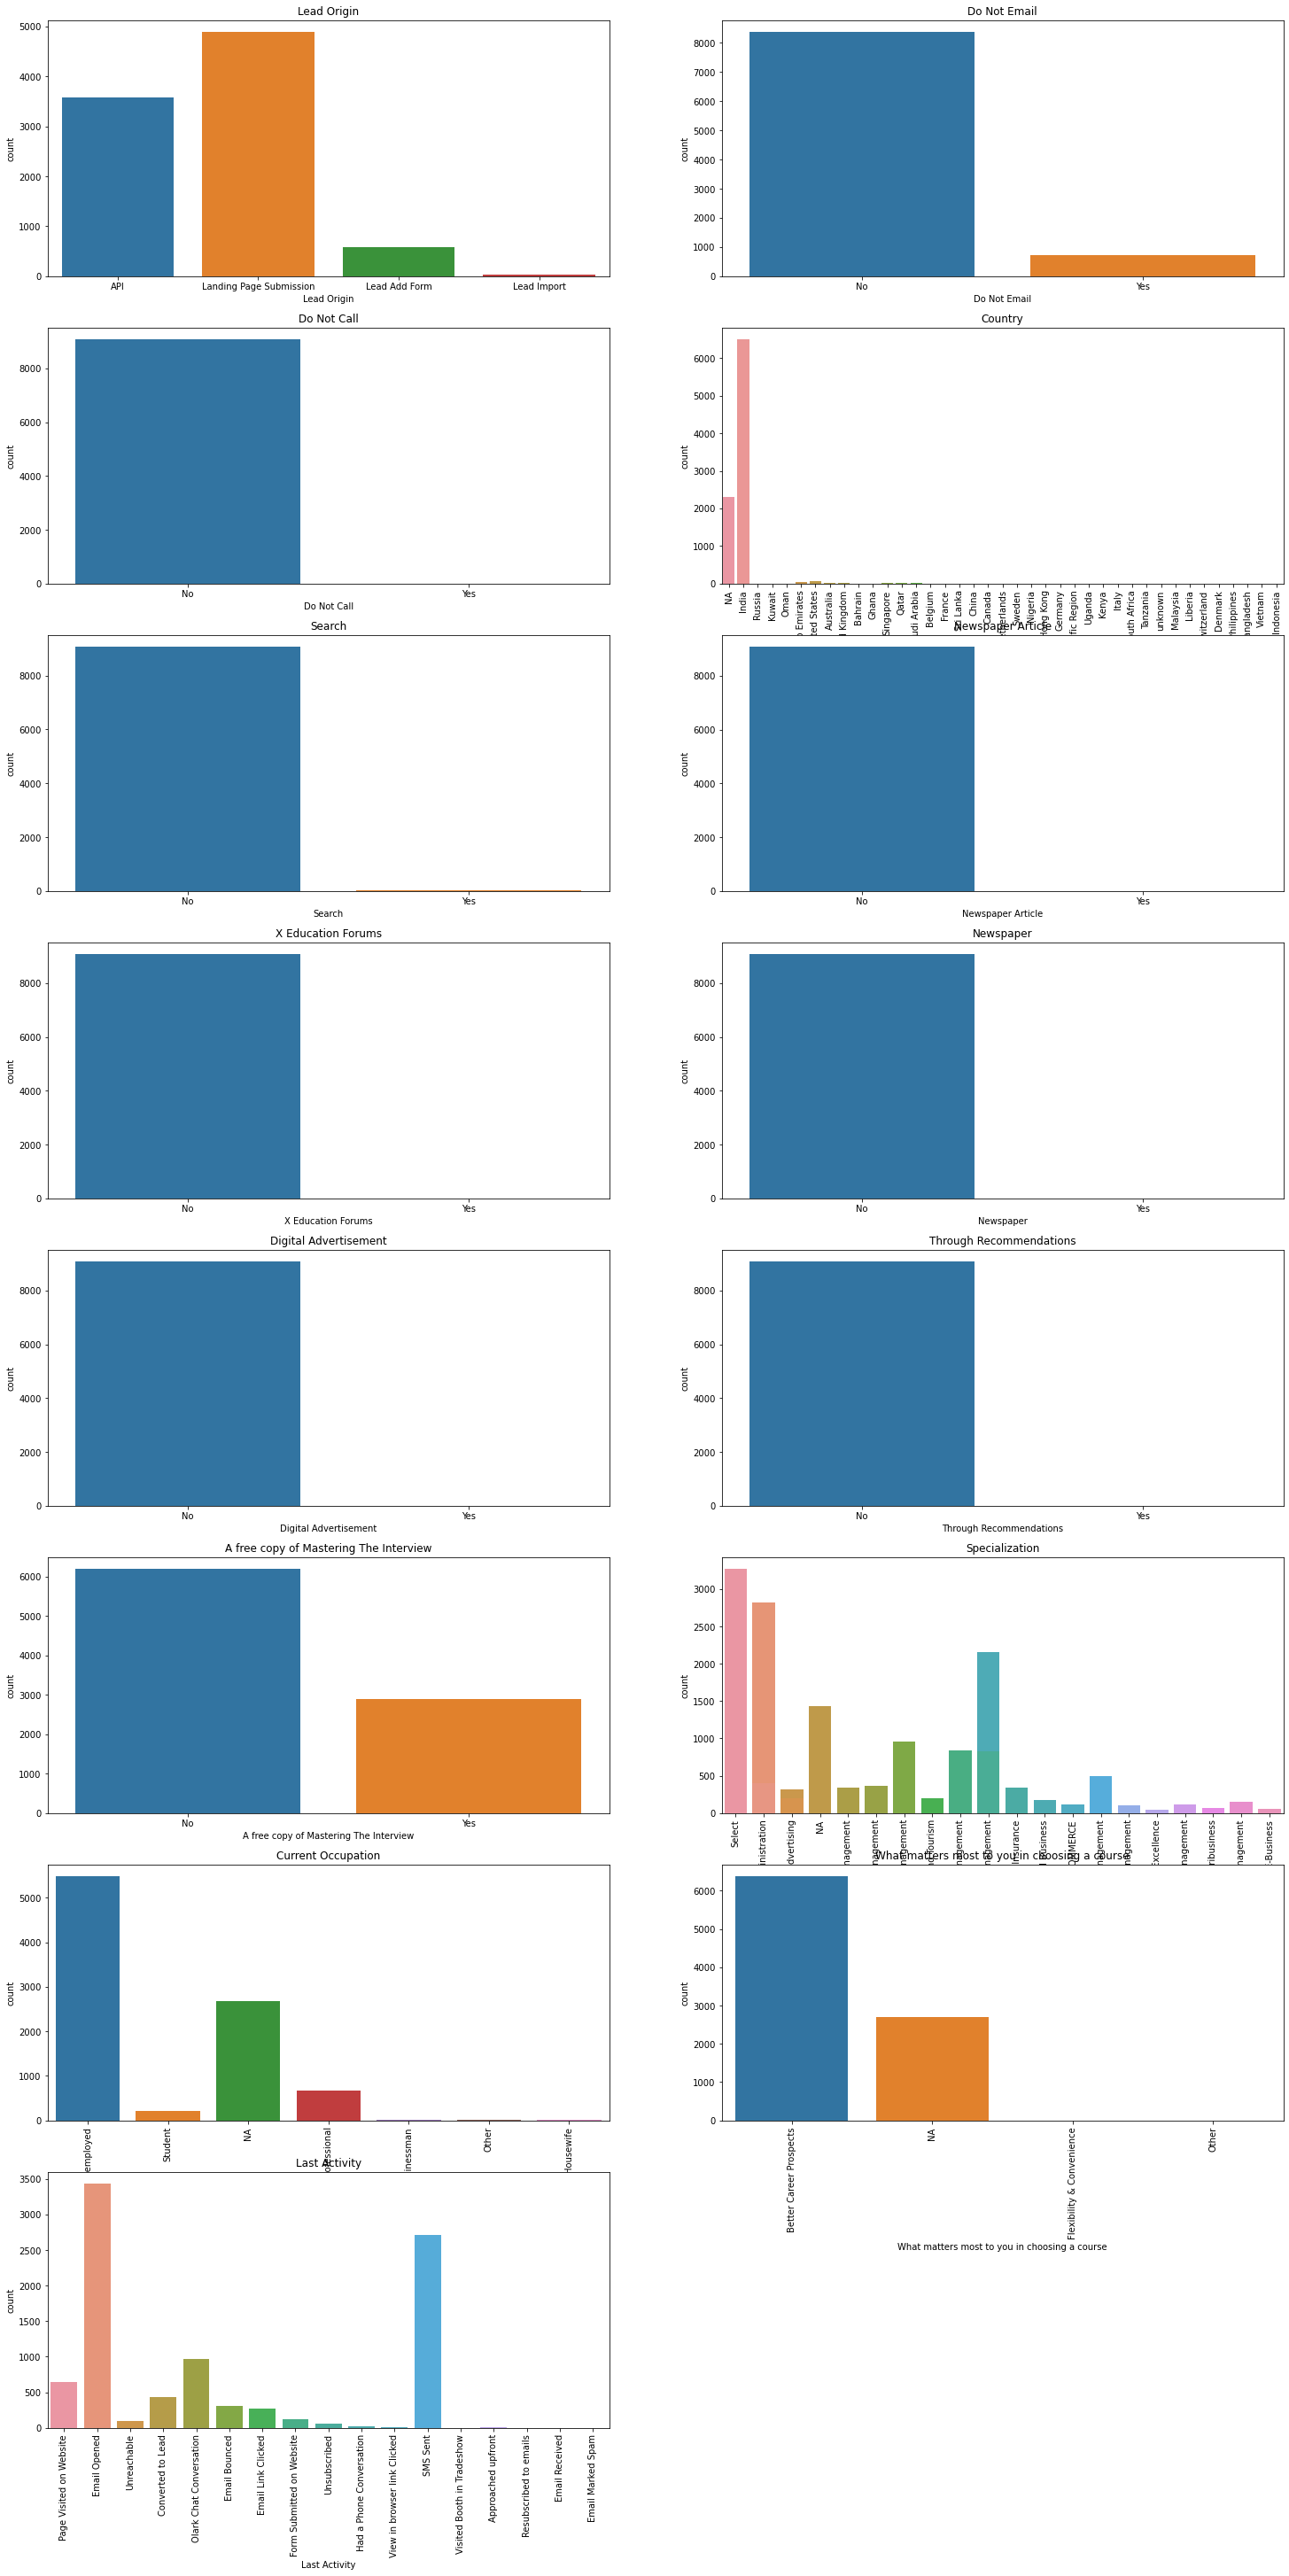

In [17]:
plt.figure(figsize = (25,50))

plt.subplot(8,2,1)
sns.countplot(df_3['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(8,2,2)
sns.countplot(df_3['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(8,2,3)
sns.countplot(df_3['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(8,2,4)
sns.countplot(df_3['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(8,2,5)
sns.countplot(df_3['Search'])
plt.title('Search')

plt.subplot(8,2,6)
sns.countplot(df_3['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(8,2,7)
sns.countplot(df_3['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(8,2,8)
sns.countplot(df_3['Newspaper'])
plt.title('Newspaper')

plt.subplot(8,2,9)
sns.countplot(df_3['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(8,2,10)
sns.countplot(df_3['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(8,2,11)
sns.countplot(df_3['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(8,2,12)
sns.countplot(df_3['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

sns.countplot(df_3['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(8,2,13)
sns.countplot(df_3['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(8,2,14)
sns.countplot(df_3['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(8,2,15)
sns.countplot(df_3['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

### Analysing numerical variables

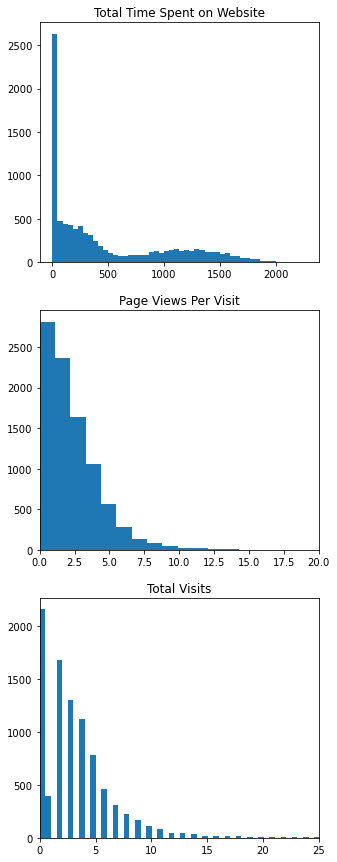

In [18]:
plt.figure(figsize = (5,15))

plt.subplot(3,1,1)
plt.hist(df_3['Total Time Spent on Website'], bins = 50)
plt.title('Total Time Spent on Website')

plt.subplot(3,1,2)
plt.hist(df_3['Page Views Per Visit'], bins = 50)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.subplot(3,1,3)
plt.hist(df_3['TotalVisits'], bins = 500)
plt.title('Total Visits')
plt.xlim(0,25)

plt.show()

#### There are a fraction of leads that get converted. We wish to relate the categorical variables with the converted proportion data.

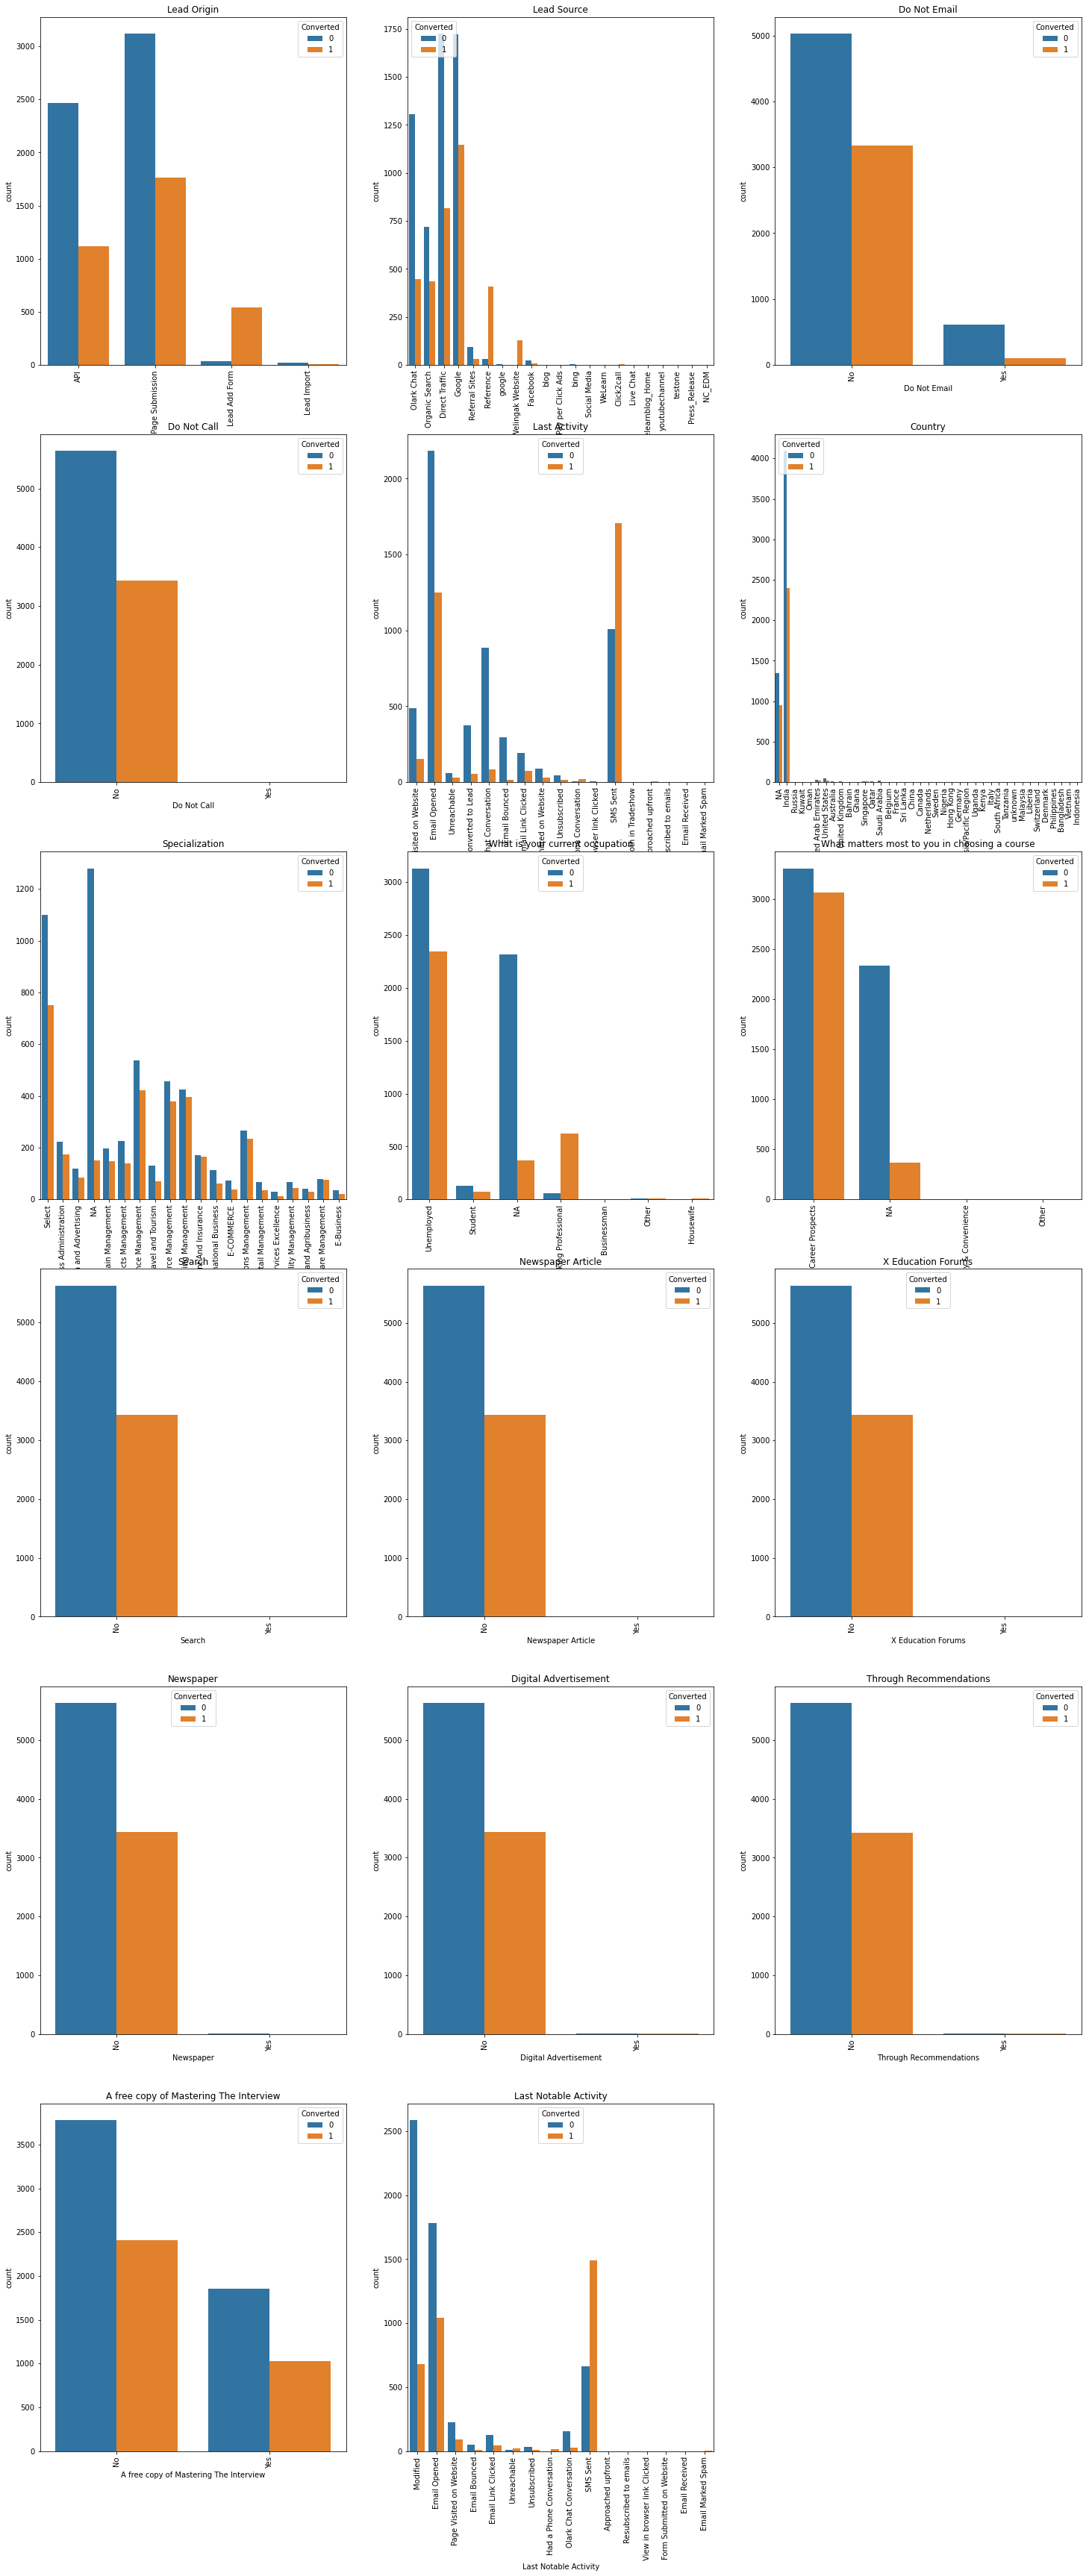

In [19]:
plt.figure(figsize= (25,60))

plt.subplot(6,3,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(6,3,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(6,3,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(6,3,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(6,3,5)
sns.countplot(x='Last Activity', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(6,3,6)
sns.countplot(x='Country', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(6,3,7)
sns.countplot(x='Specialization', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(6,3,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(6,3,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(6,3,10)
sns.countplot(x='Search', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(6,3,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(6,3,12)
sns.countplot(x='X Education Forums', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(6,3,13)
sns.countplot(x='Newspaper', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(6,3,14)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(6,3,15)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(6,3,16)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,3,17)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_3).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

#### The orange bar represents the number of converted leads with respect to the total leads given by the blue bar

-- Checking correlation b/w variables

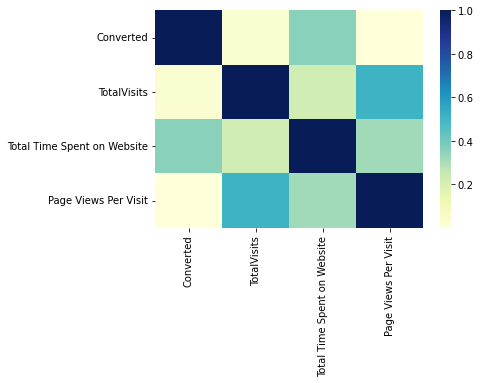

In [20]:
sns.heatmap(df_3.corr(), cmap="YlGnBu")
plt.show()

In [21]:
df_3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


#### From the final description check, it doesn't seem that there are many outliers. Hence, we would be proceeding with the next step, i.e., creation of dummy variables for model building.

## 4. Creating dummy variables for model building

In [22]:
#Checking for the type of variables as only 'object' datatype can be converted into dummy variables.
df_3.loc[:, df_3.dtypes == 'object'].columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_3[['What is your current occupation','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [24]:
# Add the results to the master dataframe
df_4 = pd.concat([df_3, dummy], axis=1)
df_4

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,...,0,0,0,0,0,0,0,0,0,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#Dropping the original columns
df_4 = df_4.drop(['Prospect ID','What is your current occupation','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_4

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### This concludes the creation of dummy variables. Now proceeding to the test-train split of dataset.

## 5. Test-train split and Model building

In [26]:
#Setting the independent variables by removing the target variable from dataset.
X = df_4.drop(['Converted'], 1)
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.00,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.00,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9237,2.0,199,2.00,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
9238,3.0,499,3.00,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# Defining the target variable in y
y = df_4['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [28]:
# Split the dataset into 75% and 25% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10)

In [29]:
# Scale the numerical variables (feature scaling)
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7232,0.007968,0.034771,0.083333,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5351,0.019920,0.338028,0.208333,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7249,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3302,0.015936,0.026408,0.166667,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7331,0.011952,0.157570,0.125000,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Because there a lot of independent variables, the correlations can't be manually used to reduce features. We shall try it later. 
#### Now, we shall be building the model.

In [30]:
# We shall do a recursive feature elimination using 15 variables, to start with
rfe = RFE(LogisticRegression(), 15)
rfe = rfe.fit(X_train, y_train)

In [31]:
# Checking the features selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('What is your current occupation_Housewife', False, 6),
 ('What is your current occupation_NA', False, 26),
 ('What is your current occupation_Other', False, 68),
 ('What is your current occupation_Student', False, 28),
 ('What is your current occupation_Unemployed', False, 36),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Direct Traffic', False, 53),
 ('Lead Source_Facebook', False, 22),
 ('Lead Source_Google', False, 66),
 ('Lead Source_Live Chat', False, 74),
 ('Lead Source_NC_EDM', False, 119),
 ('Lead Source_Olark Chat', False, 63),
 ('Lead Source_Organic Search', False, 65),
 ('Lead Source_Pay per Click Ads', False, 121),
 ('Lead Source_Press_Release', False, 86),
 ('Lead Source_Reference', False, 114),

In [32]:
# Converting the testing dataset as the one with features selected by RFE
col = X_train.columns[rfe.support_]

In [33]:
X_train = X_train[col]

In [34]:
# Checking a bit of statistics after Linear regression
X_train_sm = sm.add_constant(X_train)
logreg_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_1 = logreg_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2883.3
Date:                Tue, 12 Apr 2022   Deviance:                       5766.5
Time:                        11:42:22   Pearson chi2:                 7.07e+03
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0025      0.091    -11.026      0.000      -1.181      -0.824
TotalVisits                                             10.8628      2.565      4.236      0.000       5.836      15.889
Total Time Spent on Website                              4.6954      0.162     28.931      0.000       4.377       5.013
What is your current occupation_Working Professional     0.6791      0.046     14.789      0.000       0.589       0.769
What is your current occupation_Working Professional     0.6791      0.046     14.789      0.000       0.589       0.769
Lead Origin_Lead Add Form                                2.6893      0.217     12.388      0.000       2.264       3.115
Lead Source_Welingak Website                             2.8608      1.034      2.767      0.006       0.835       4.887
Do Not Email_Yes                                        -1.8099      0.173    -10.468      0.000      -2.149      -1.471
Last Activity_Olark Chat Conversation                   -1.2651      0.185     -6.843      0.000      -1.627      -0.903
Country_NA                                               1.4522      0.109     13.375      0.000       1.239       1.665
What is your current occupation_Housewife               11.4465   7183.137      0.002      0.999   -1.41e+04    1.41e+04
What is your current occupation_Housewife               11.4465   7183.137      0.002      0.999   -1.41e+04    1.41e+04
What is your current occupation_Working Professional     0.6791      0.046     14.789      0.000       0.589       0.769
What is your current occupation_Working Professional     0.6791      0.046     14.789      0.000       0.589       0.769
Last Notable Activity_Email Link Clicked                -2.0815      0.258     -8.066      0.000      -2.587      -1.576
Last Notable Activity_Email Opened                      -1.4051      0.084    -16.719      0.000      -1.570      -1.240
Last Notable Activity_Modified                          -1.8185      0.092    -19.724      0.000      -1.999      -1.638
Last Notable Activity_Olark Chat Conversation           -1.5621      0.352     -4.443      0.000      -2.251      -0.873
Last Notable Activity_Page Visited on Website           -1.8867      0.199     -9.477      0.000      -2.277      -1.497
========================================================================================================================
"""

#### Because the p-values of 'What is your current occupation_Housewife' is >0.05, we should consider removing it as it might disturb our analysis.

In [35]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [36]:
# Make a table to check the Variance Inflation Factor for all the variables
varif = pd.DataFrame()
varif['Features'] = X_train.columns
varif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
varif

,Features,VIF
0,TotalVisits,1.640414
1,Total Time Spent on Website,1.625390
2,Lead Origin_Lead Add Form,1.691749
3,Lead Source_Welingak Website,1.291587
4,Do Not Email_Yes,1.109373
5,Last Activity_Olark Chat Conversation,1.896786
6,Country_NA,2.049165
7,Last Notable Activity_Email Link Clicked,1.037766
8,Last Notable Activity_Email Opened,1.485373
9,Last Notable Activity_Modified,1.800292


#### The VIF value for 'What is your current occupation_Working Professional' seems to be huge which shows some inconsistency. Let's remove it for ease of analysis. After removing it, we produced the VIF chart again hence it might seem different at the first outlook.

In [37]:
# Fit the model with the updated set of variables
X_train_sm = sm.add_constant(X_train)
logreg_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model_2 = logreg_2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6792
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3053.9
Date:                Tue, 12 Apr 2022   Deviance:                       6107.8
Time:                        11:42:22   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8282      0.088     -9.438      0.000      -1.000      -0.656
TotalVisits                                      11.0451      2.513      4.395      0.000       6.120      15.970
Total Time Spent on Website                       4.7146      0.158     29.892      0.000       4.405       5.024
Lead Origin_Lead Add Form                         3.0305      0.211     14.375      0.000       2.617       3.444
Lead Source_Welingak Website                      2.4318      1.033      2.354      0.019       0.407       4.456
Do Not Email_Yes                                 -1.8445      0.167    -11.059      0.000      -2.171      -1.518
Last Activity_Olark Chat Conversation            -1.3349      0.182     -7.321      0.000      -1.692      -0.978
Country_NA                                        1.3834      0.105     13.170      0.000       1.177       1.589
Last Notable Activity_Email Link Clicked         -2.0846      0.251     -8.292      0.000      -2.577      -1.592
Last Notable Activity_Email Opened               -1.4227      0.081    -17.463      0.000      -1.582      -1.263
Last Notable Activity_Modified                   -1.8295      0.089    -20.511      0.000      -2.004      -1.655
Last Notable Activity_Olark Chat Conversation    -1.5153      0.339     -4.469      0.000      -2.180      -0.851
Last Notable Activity_Page Visited on Website    -1.9234      0.191    -10.053      0.000      -2.298      -1.548
=================================================================================================================
"""

In [38]:
# Make a table to check the Variance Inflation Factor for all the variables again for the new model
varif = pd.DataFrame()
varif['Features'] = X_train.columns
varif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
varif

,Features,VIF
0,TotalVisits,1.640414
1,Total Time Spent on Website,1.625390
2,Lead Origin_Lead Add Form,1.691749
3,Lead Source_Welingak Website,1.291587
4,Do Not Email_Yes,1.109373
5,Last Activity_Olark Chat Conversation,1.896786
6,Country_NA,2.049165
7,Last Notable Activity_Email Link Clicked,1.037766
8,Last Notable Activity_Email Opened,1.485373
9,Last Notable Activity_Modified,1.800292


#### Here, all the p-values are <0.05 and the VIF is <5. The model seems to be a good one. Now let's predict the results from the testing dataset.

## 6. Testing and Prediction & Evaluation

In [39]:
# Checking on how much our linear model fit with the actual output
y_train_pred = model_2.predict(X_train_sm)
y_train_pred[:15]

7232    0.031477
5351    0.392386
7249    0.635324
3302    0.124504
7331    0.201638
5448    0.929477
8402    0.589112
3946    0.525526
3906    0.068542
5194    0.101075
7740    0.116025
1065    0.366567
9097    0.068542
4097    0.013967
8289    0.081080
dtype: float64

In [40]:
# Make the prediction dataset into an array by reshaping it
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.03147714, 0.39238591, 0.63532398, 0.12450374, 0.20163842,
       0.92947674, 0.58911218, 0.52552632, 0.06854156, 0.10107502,
       0.11602496, 0.36656681, 0.06854156, 0.01396725, 0.08108049])

In [41]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_1 = pd.DataFrame({'Converted':y_train.values, 'Probability':y_train_pred})
y_train_pred_1

,Converted,Probability
0,0,0.031477
1,0,0.392386
2,1,0.635324
3,0,0.124504
4,0,0.201638
...,...,...
6800,0,0.187591
6801,0,0.095121
6802,0,0.285892
6803,0,0.068542


In [42]:
# If the probability is >0.5, we produce the predicted value to be 1, else 0.
y_train_pred_1['Predicted'] = y_train_pred_1.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_1

,Converted,Probability,Predicted
0,0,0.031477,0
1,0,0.392386,0
2,1,0.635324,1
3,0,0.124504,0
4,0,0.201638,0
...,...,...,...
6800,0,0.187591,0
6801,0,0.095121,0
6802,0,0.285892,0
6803,0,0.068542,0


### Now let's evaluate our model.

In [43]:
# Check the accuracy of our model
metrics.accuracy_score(y_train_pred_1.Converted, y_train_pred_1.Predicted)

0.7957384276267451

#### Hence, the accuracy of our linear regression model turned to be around 80%, which was our threshold. 

#### Now, we would be predicting the output with the testing set.

In [44]:
# First, we need to scale our dataset
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [45]:
# We need to note the columns of our training dataset
col = X_train.columns

In [46]:
# Select only the columns used in training set into testing set
X_test = X_test[col]

In [47]:
# Adding a linear regression constant to the testing set
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Country_NA,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8308,1.0,0.019920,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.015936,0.001320,0,0,0,0,0,0,0,0,0,0
2085,1.0,0.000000,0.000000,1,1,0,0,1,0,1,0,0,0
4048,1.0,0.015936,0.617077,0,0,0,0,0,0,0,0,0,0
4790,1.0,0.015936,0.005282,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,1.0,0.000000,0.000000,0,0,0,1,1,0,0,1,0,0
409,1.0,0.007968,0.110035,0,0,0,0,0,0,1,0,0,0
7372,1.0,0.000000,0.000000,0,0,0,0,1,1,0,0,0,0
3790,1.0,0.039841,0.066461,0,0,0,0,0,0,0,1,0,0


In [52]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = model_2.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [54]:
#Append the datasets
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append the training and testing set
y_pred_1 = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_1= y_pred_1.rename(columns = {0 : 'Probability'})
y_pred_1.head()

,Converted,Probability
0,0,0.384000
1,1,0.343893
2,1,0.989996
3,1,0.905256
4,0,0.114046


In [49]:
# If the probability is >0.5, we produce the predicted value to be 1, else 0.
y_pred_1['Prediction'] = y_pred_1.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_pred_1

,Converted,Probability,Prediction
0,0,0.384000,0
1,1,0.343893,0
2,1,0.989996,1
3,1,0.905256,1
4,0,0.114046,0
...,...,...,...
2264,0,0.068542,0
2265,0,0.161895,0
2266,0,0.178077,0
2267,1,0.129617,0


In [51]:
# Check the accuracy
metrics.accuracy_score(y_pred_1['Converted'], y_pred_1.Prediction)

0.7999118554429264

### The accuracy turns up to be 80%, which touches the expected threshold.

## 7. Conclusion

_The variables that directly impact the lead conversion (Ordered in descending order) :_

1. The total time spent on website.
2. Total number of visits.
3. When the lead source was:
    Direct traffic,
    Welingak website,
    Organic search

4. When the last activity was:
   Olark chat conversation
   
5. When the lead origin is Lead add format.

Prioritizing these factors would lead to a high lead conversion rate.